In [2]:
import os
import scanpy
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import re
import sklearn
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from collections import Counter
import random
import seaborn
import sys
import shutil
import scvelo as scv
import bbknn
import tqdm
#Load my pipeline functions
import importlib
import importlib.util
spec = importlib.util.spec_from_file_location("ScanpyUtilsMT", os.path.expanduser("../../utils/ScanpyUtilsMT.py"))
sc_utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sc_utils)
sc.settings.figdir='/wynton/group/ye/mtschmitz/WBfigures/macWbSuperviseHB/'
scv.settings.figdir='/wynton/group/ye/mtschmitz/WBfigures/macWbSuperviseHB/'
sc.settings.file_format_figs='pdf'
sc.settings.autosave=False
sc.settings.autoshow=True

In [3]:
newfile='/wynton/group/ye/mtschmitz/macaquedevbrain/CAT202002_h5ad/KDCbVelocityMacaqueWbPresupervisehb_subset.h5ad'
newfile='/wynton/group/ye/mtschmitz/macaquedevbrain/CAT202002_h5ad/KDCbVelocityPanHumanPresupervisehb_subset.h5ad'
newfile='/wynton/group/ye/mtschmitz/macaquedevbrain/CAT202002_h5ad/KDCbVelocityMouseWbPresupervisionhb_subset.h5ad'

adata=sc.read(newfile)


In [17]:
adata

AnnData object with n_obs × n_vars = 79185 × 33340
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'batch_name', 'dataset_name', 'timepoint', 'region', 'batch', 'clean_cellname', 'full_cellname', 'msregion', 'general_region', 'leiden', 'supervised_name', 'percent_ribo', 'percent_mito'
    var: 'feature_type-0', 'id-0', 'name-0', 'feature_type-1-0', 'id-1-0', 'name-1-0', 'feature_type-1-1', 'id-1-1', 'name-1-1', 'feature_type-1-10', 'id-1-10', 'name-1-10', 'feature_type-1-100', 'id-1-100', 'name-1-100', 'feature_type-1-101', 'id-1-101', 'name-1-101', 'feature_type-1-102', 'id-1-102', 'name-1-102', 'feature_type-1-103', 'id-1-103', 'name-1-103', 'feature_type-1-104', 'id-1-104', 'name-1-104', 'feature_type-1-105', 'id-1-105', 'name-1-105', 'feature_type-1-106', 'id-1-106', 'name-1-106', 'feature_type-1-107', 'id-1-107', 'name-1-107', 'feature_type-1-108', 'id-1-108', 'name-1-108', 'feature_type-1-109', 'id-1-109', 'name-1-109', 'feature_type-1-11', 'id-1-11', 'name

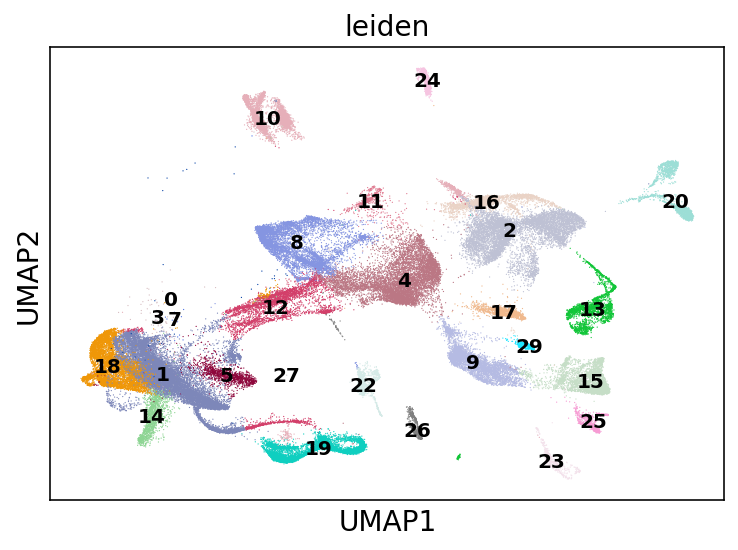

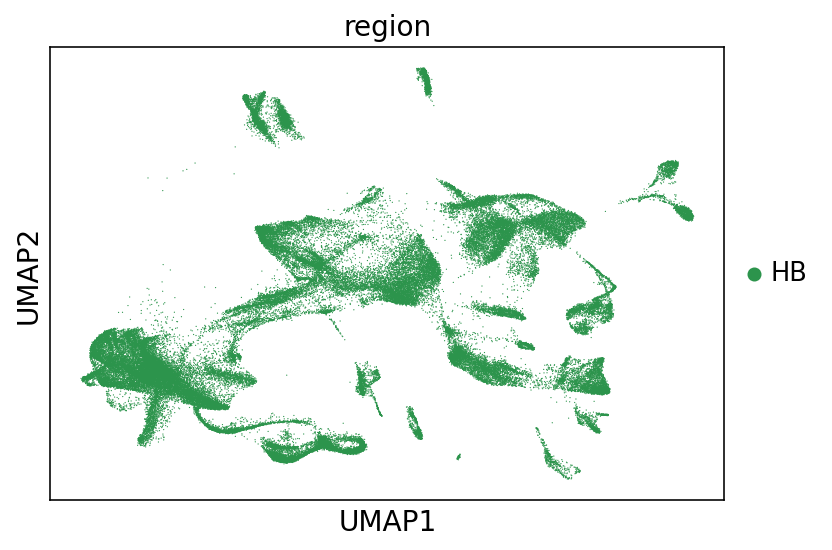

In [9]:
%matplotlib inline
sc.pl.umap(adata,color='leiden', legend_loc='on data')
sc.pl.umap(adata,color=['region'],use_raw=False)

In [10]:
#sc.tl.leiden(adata)
sc.tl.umap(adata)

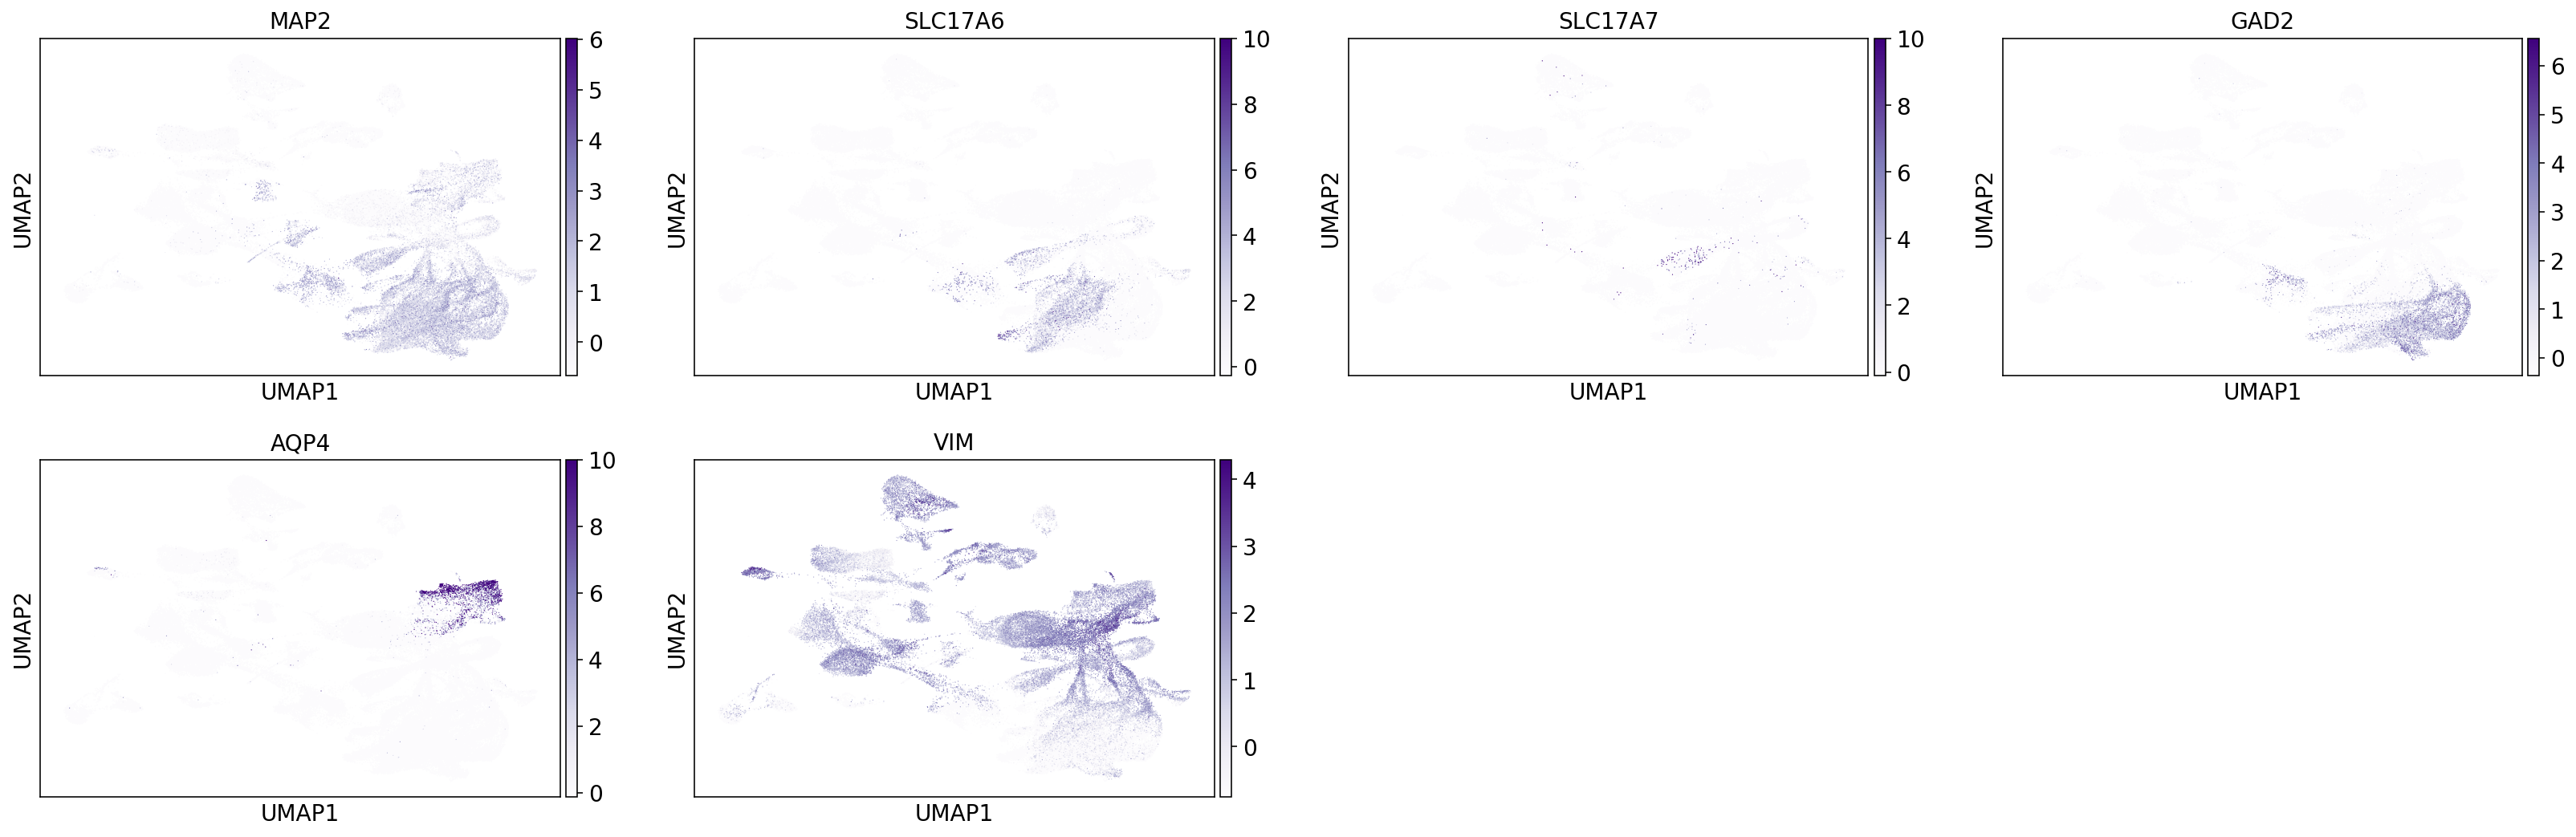

In [22]:
sc.pl.umap(adata,color=['MAP2','SLC17A6','SLC17A7','GAD2','AQP4','VIM'],use_raw=False)

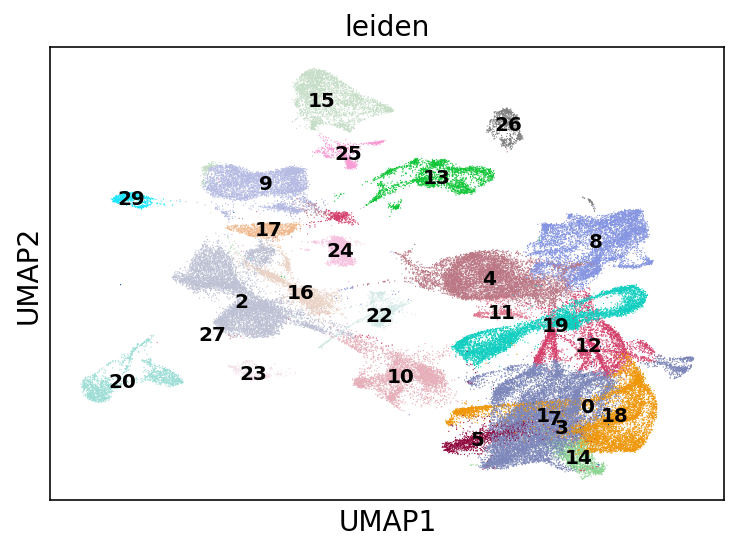

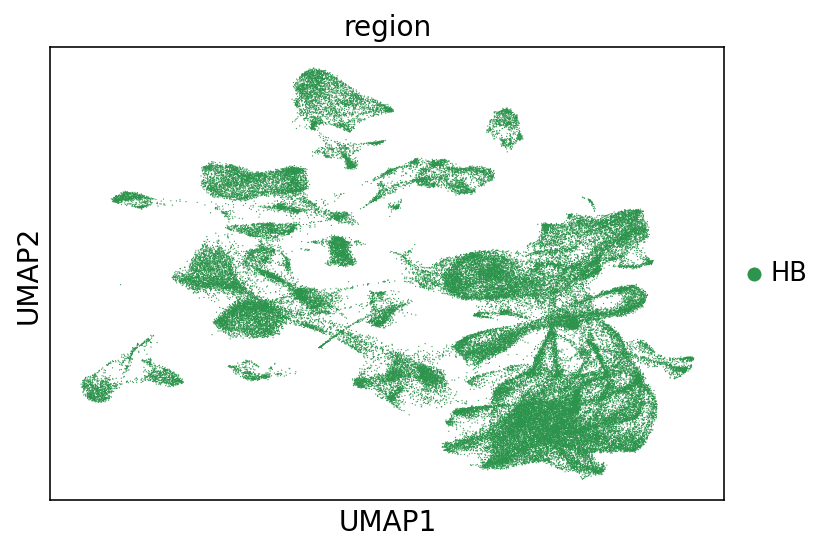

In [11]:
sc.pl.umap(adata,color='leiden', legend_loc='on data')
sc.pl.umap(adata,color=['region'],use_raw=False)

In [12]:
newfile='/wynton/group/ye/mtschmitz/macaquedevbrain/CAT202002_h5ad/KDCbVelocityMacaqueWbPresupervisehb_subset.h5ad'

qdata=sc.read(newfile)


In [13]:
qdata

AnnData object with n_obs × n_vars = 75338 × 43529
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'file_name', 'batch_name', 'timepoint', 'region', 'batch', 'clean_cellname', 'full_cellname', 'demux_type', 'assignment', 'msregion', 'general_region', 'supervised_name', 'percent_ribo', 'percent_mito', 'leiden'
    var: 'feature_type-0-0-0', 'id-0-0-0', 'name-0-0-0', 'feature_type-1-0-0', 'id-1-0-0', 'name-1-0-0', 'feature_type-0-1-0', 'id-0-1-0', 'name-0-1-0', 'feature_type-1-1-0', 'id-1-1-0', 'name-1-1-0', 'feature_type-0-10-0', 'id-0-10-0', 'name-0-10-0', 'feature_type-1-10-0', 'id-1-10-0', 'name-1-10-0', 'feature_type-0-100-0', 'id-0-100-0', 'name-0-100-0', 'feature_type-1-100-0', 'id-1-100-0', 'name-1-100-0', 'feature_type-0-101-0', 'id-0-101-0', 'name-0-101-0', 'feature_type-1-101-0', 'id-1-101-0', 'name-1-101-0', 'feature_type-0-102-0', 'id-0-102-0', 'name-0-102-0', 'feature_type-1-102-0', 'id-1-102-0', 'name-1-102-0', 'feature_type-0-103-0', 'id-0-103-0', '

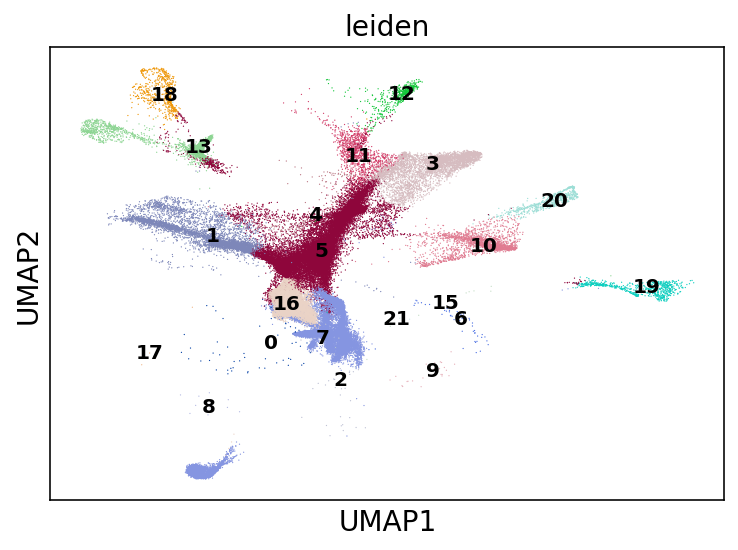

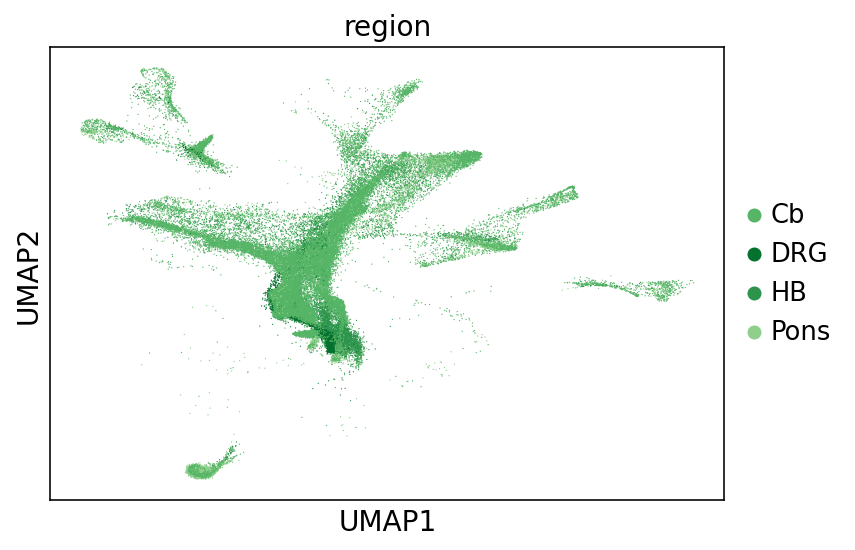

In [14]:
%matplotlib inline
sc.pl.umap(qdata,color='leiden', legend_loc='on data')
sc.pl.umap(qdata,color=['region'],use_raw=False)

In [15]:
#sc.tl.leiden(qdata)
sc.tl.umap(qdata)

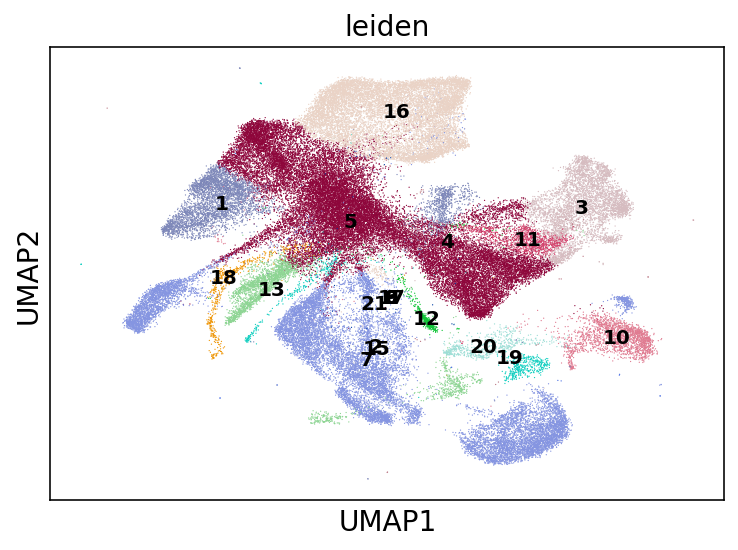

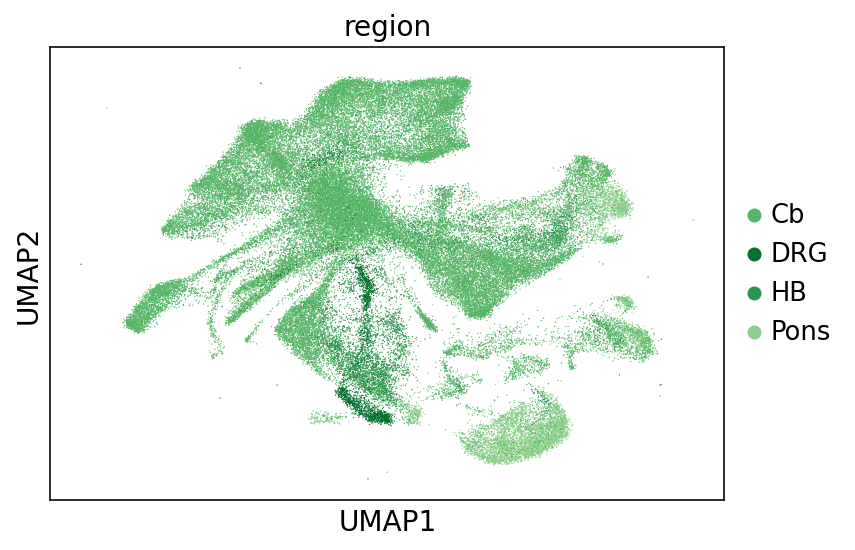

In [16]:
sc.pl.umap(qdata,color='leiden', legend_loc='on data')
sc.pl.umap(qdata,color=['region'],use_raw=False)

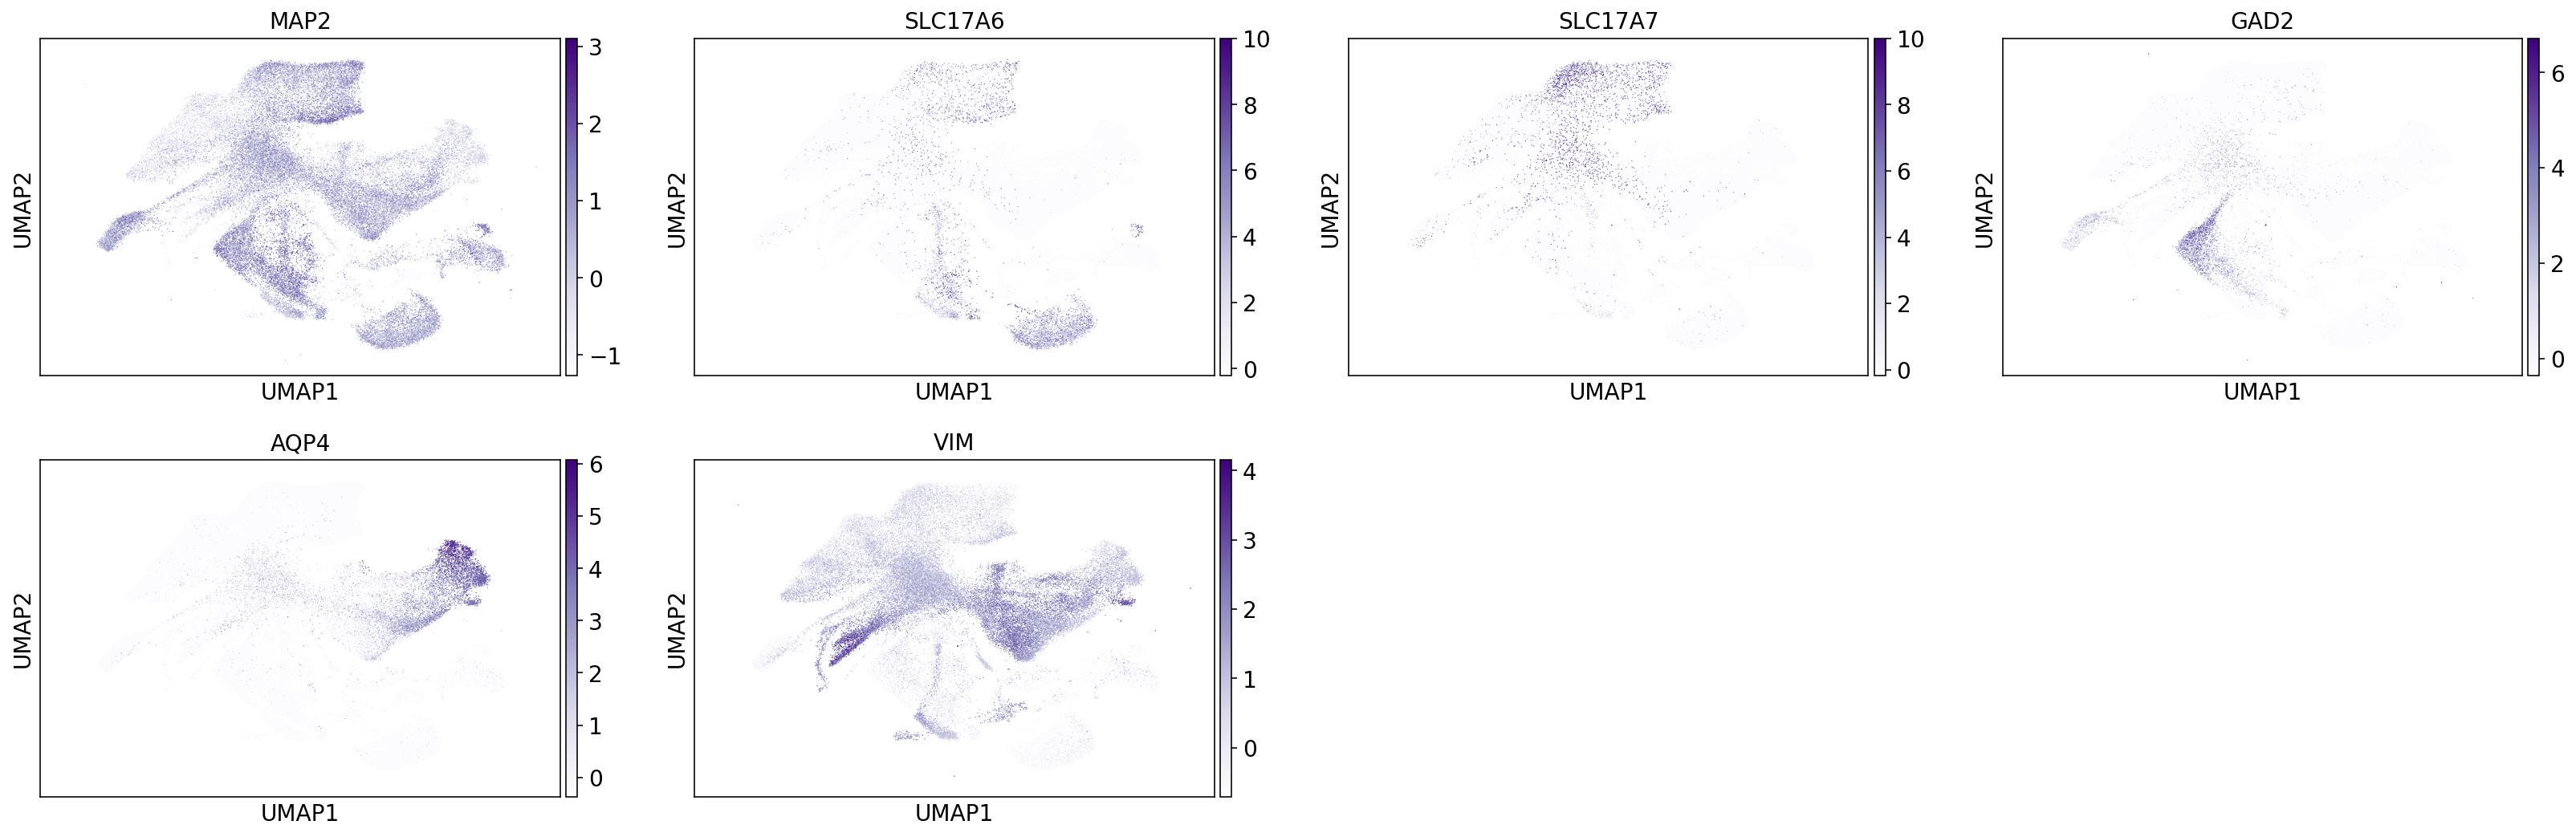

In [21]:
sc.pl.umap(qdata,color=['MAP2','SLC17A6','SLC17A7','GAD2','AQP4','VIM'],use_raw=False)

In [25]:
qdata=qdata[qdata.obs.leiden.isin(qdata.obs.leiden.value_counts().index[qdata.obs.leiden.value_counts()>10]),:]
hierarchy_key='leiden'
rgs=sc.tl.rank_genes_groups(qdata,groupby=hierarchy_key,method='logreg',use_raw=False,copy=True).uns['rank_genes_groups']#,penalty='elasticnet',solver='saga')#or penalty='l1'
result=rgs
groups = result['names'].dtype.names
df=pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'scores']})
df.to_csv(os.path.join(sc.settings.figdir,"LogReg"+hierarchy_key+"Norm.csv"))
topgenes=df.iloc[0:4,['_n' in x for x in df.columns]].T.values
cols=df.columns[['_n' in x for x in df.columns]]
cols=[re.sub('_n','',x) for x in cols]
topdict=dict(zip(cols,topgenes))
sc.tl.dendrogram(qdata,groupby=hierarchy_key)
var_dict=dict(zip(qdata.uns["dendrogram_['"+hierarchy_key+"']"]['categories_ordered'],[topdict[x] for x in qdata.uns["dendrogram_['"+hierarchy_key+"']"]['categories_ordered']]))
sc.pl.matrixplot(qdata,groupby=hierarchy_key,var_names=var_dict,save='top_degenes',cmap='RdBu_r',use_raw=False,dendrogram=True)

FileNotFoundError: [Errno 2] No such file or directory: '/wynton/group/ye/mtschmitz/WBfigures/macWbSuperviseHB/LogRegleidenNorm.csv'

In [24]:
qdata.obs.leiden.value_counts()

5     28526
7     16783
16    11637
1      4848
3      4659
13     2702
10     2093
11     1192
19      722
20      652
18      631
12      460
4       217
0        68
6        50
2        42
9        27
15       12
Name: leiden, dtype: int64